## Locally Weighted Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
dfx=pd.read_csv('../../Datasets/Locally Weighted Regression/weightedX.csv')
dfy=pd.read_csv('../../Datasets/Locally Weighted Regression/weightedY.csv')
X=dfx.values
Y=dfy.values
print(X.shape,Y.shape)

(99, 1) (99, 1)


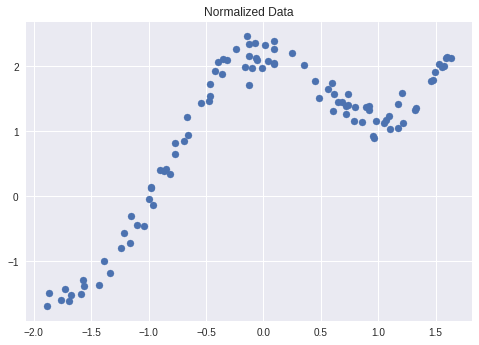

In [3]:
#Normalize the data
X=(X-X.mean())/X.std()
plt.style.use("seaborn")
plt.title("Normalized Data")
plt.scatter(X,Y)
plt.show()

In [4]:
#generate W(m*m) --- diagonal matrix(Weight matrix)
def getW(query_point,X,tau):
    M=X.shape[0]
    W=np.mat(np.eye(M))
    for i in range(M):
        xi=X[i]
        x=query_point
        W[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W    

In [5]:
#get weight matrix corresponding to dataset
X=np.mat(X)
Y=np.mat(Y)
W=getW(-1,X,1)
M=X.shape[0]
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


In [6]:
#closed form solution Implementation to LOWESS
def predict(X,Y,query_x,tau):
    ones=np.ones((M,1))
    X_=np.hstack((X,ones))
    qx=np.mat((query_x,1))
    W=getW(qx,X_,tau)
    
    theta=np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred=np.dot(qx,theta)
    return theta,pred

In [7]:
theta,pred=predict(X,Y,1.0,1.0)
print(theta)
print(pred)

[[0.14069504]
 [1.45348191]]
[[1.59417694]]


In [9]:
#visualize function
def plotPrediction(tau):
    X_test=np.linspace(-2,2,20)
    Y_test=[]
    for xq in X_test:
        theta,pred=predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    Y_test=np.array(Y_test)
    X0=np.array(X)
    Y0=np.array(Y)
    plt.scatter(X0,Y0)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

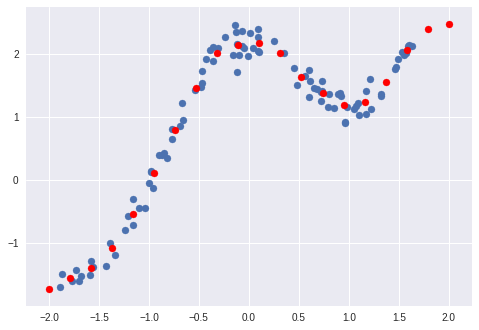

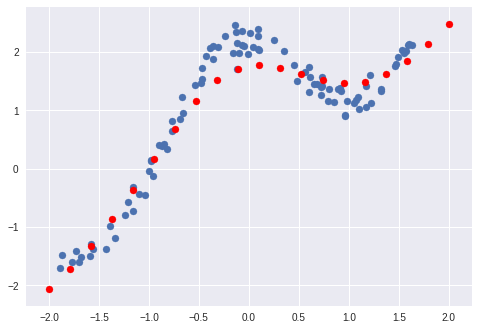

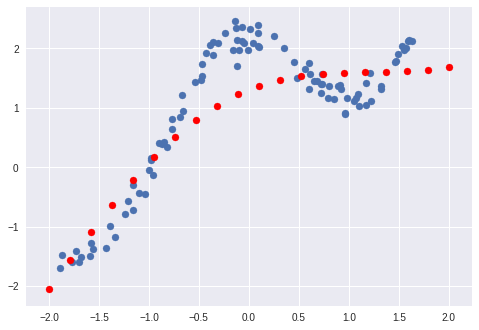

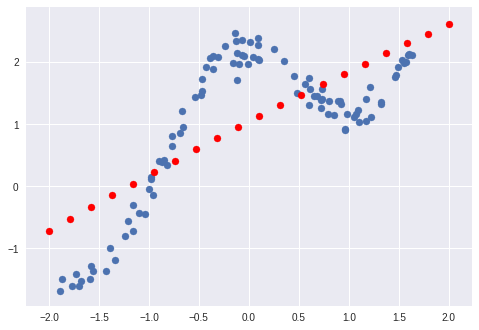

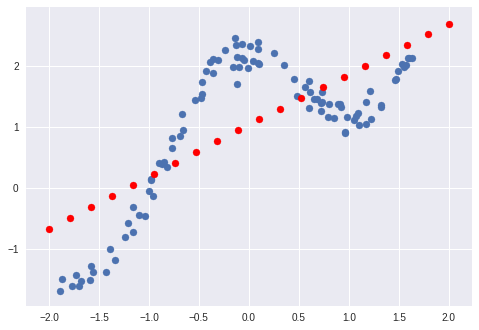

In [11]:
#plot with different values of Tau
taus=[0.1,0.5,1,5,10]
for i in taus:
    plotPrediction(i)